In [571]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("dataset.csv",sep=';')

In [572]:
data.dropna(inplace=True)

In [573]:
class Encoder():
    def __init__(self):
        self.invert={}
        self.non_invert={}
    def fit(self,X: pd.Series):
        self.non_invert={}
        i=0
        for value in X.unique():
            self.non_invert[value]=i
            self.invert[i]=value
            i+=1
    def transform(self,X: pd.Series):
        return X.replace(self.non_invert)
    def inverse_transform(self,X: pd.Series):
        return X.replace(self.invert)

In [574]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

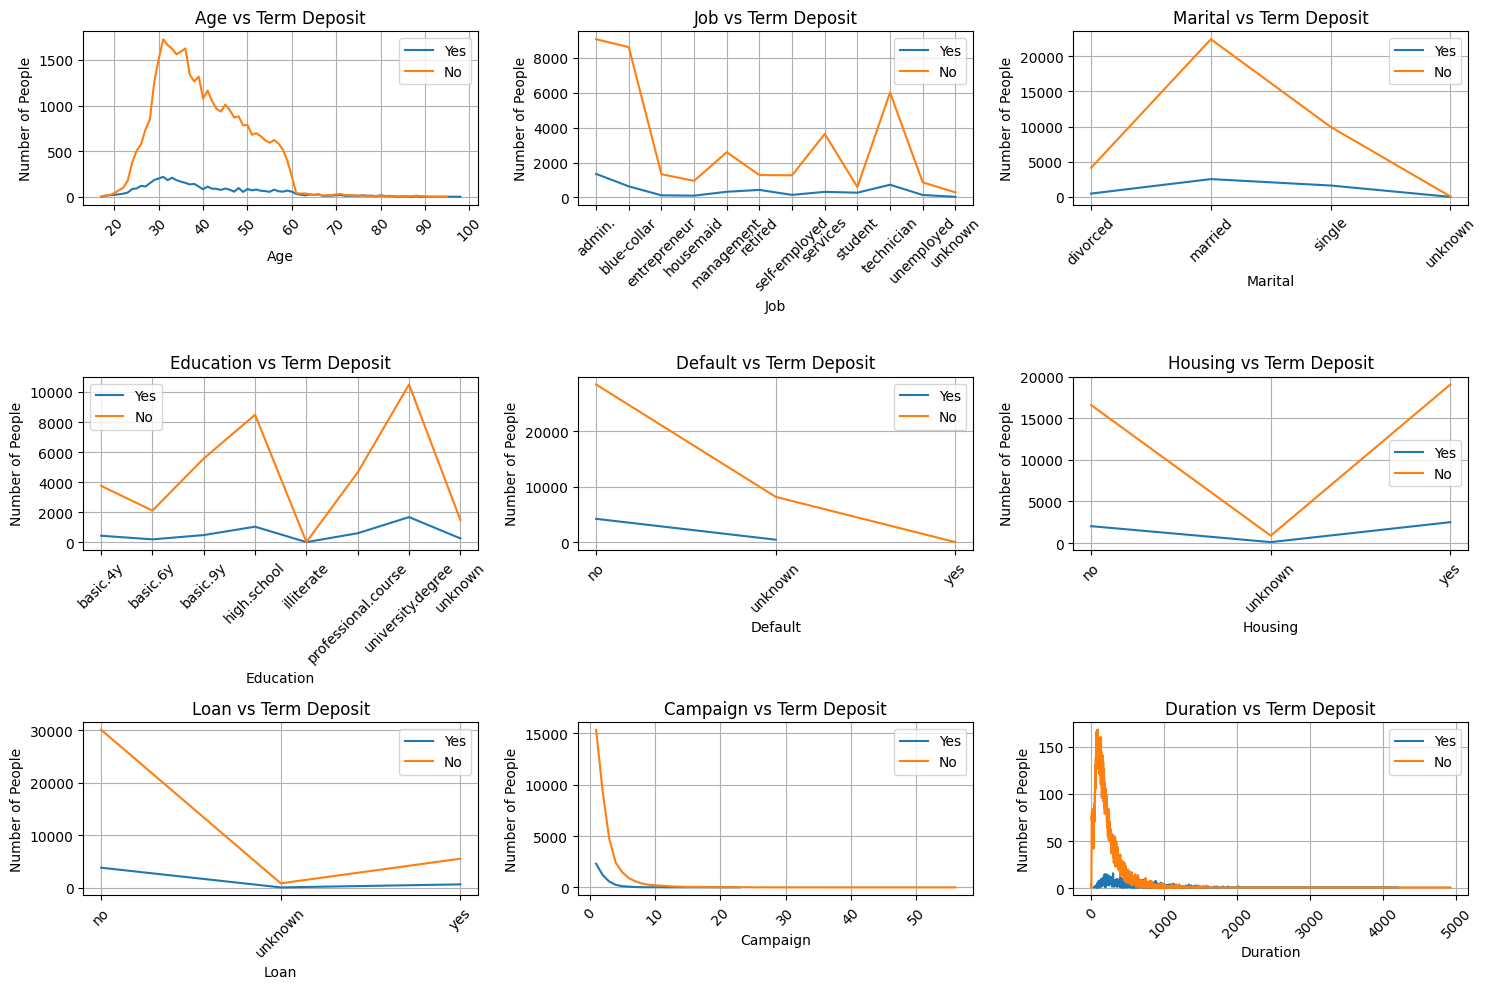

In [575]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Bigger figure for clarity
feature_name = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'campaign', 'duration']

for i, fea in enumerate(feature_name):
    row = i // 3
    col = i % 3
    
    yes_column = data[data['y'] == 'yes'][fea].value_counts().sort_index()
    no_column = data[data['y'] == 'no'][fea].value_counts().sort_index()
    
    ax = axs[row, col]
    ax.plot(yes_column.index, yes_column.values, label='Yes')
    ax.plot(no_column.index, no_column.values, label='No')
    
    ax.set_title(f'{fea.capitalize()} vs Term Deposit')
    ax.set_xlabel(fea.capitalize())
    ax.set_ylabel('Number of People')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


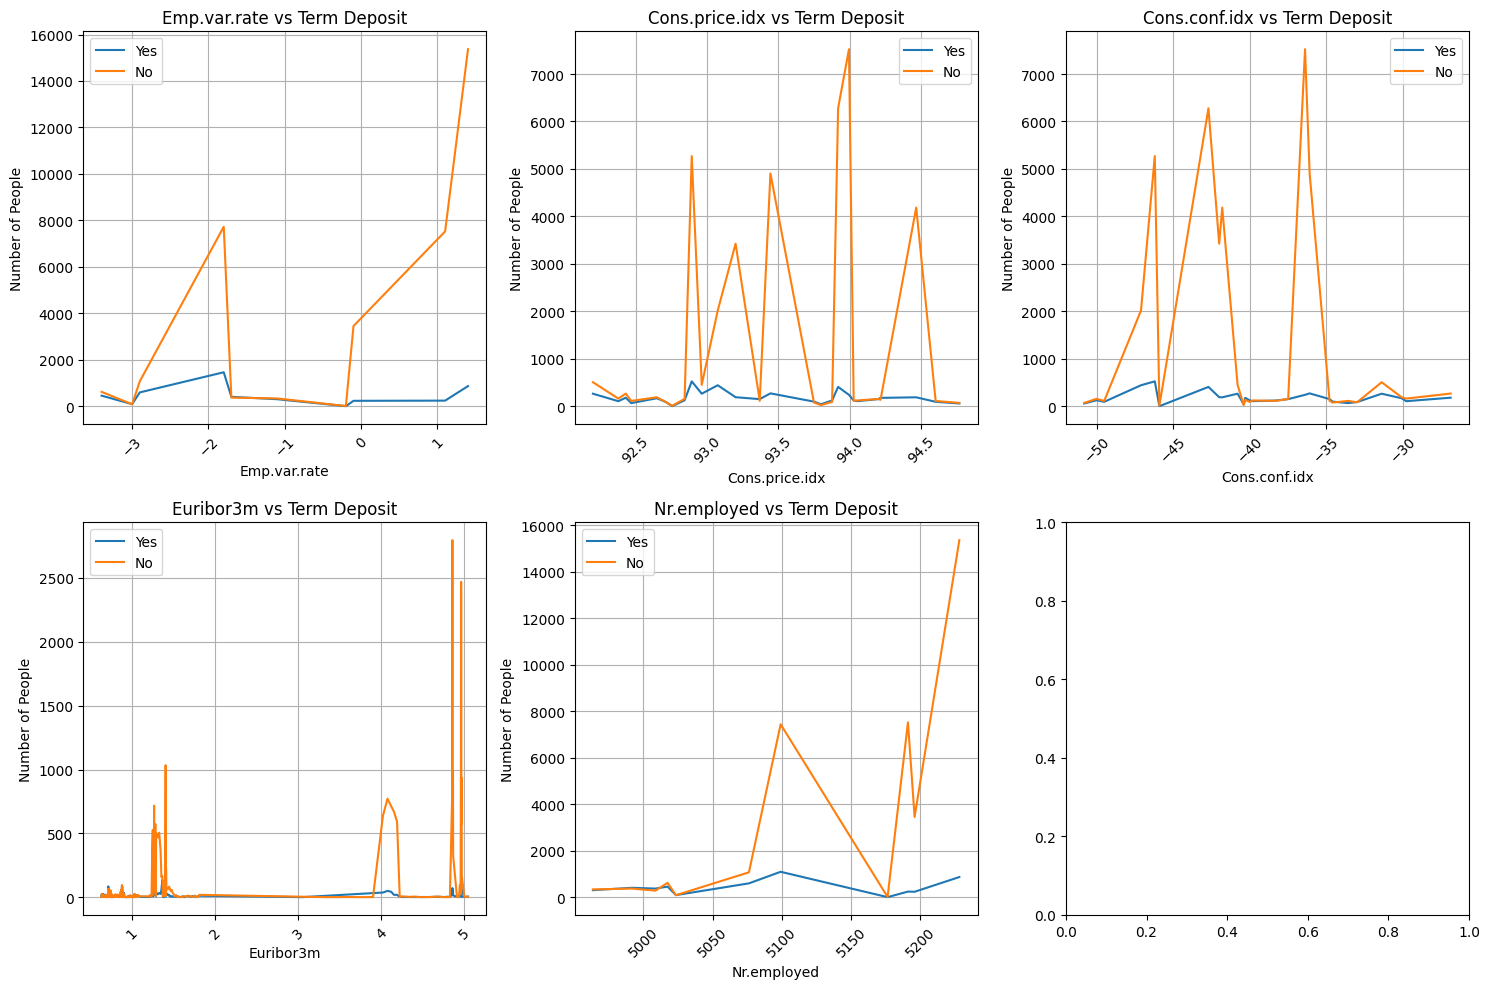

In [576]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Bigger figure for clarity
feature_name = ['emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']

for i, fea in enumerate(feature_name):
    row = i // 3
    col = i % 3
    
    yes_column = data[data['y'] == 'yes'][fea].value_counts().sort_index()
    no_column = data[data['y'] == 'no'][fea].value_counts().sort_index()
    
    ax = axs[row, col]
    ax.plot(yes_column.index, yes_column.values, label='Yes')
    ax.plot(no_column.index, no_column.values, label='No')
    
    ax.set_title(f'{fea.capitalize()} vs Term Deposit')
    ax.set_xlabel(fea.capitalize())
    ax.set_ylabel('Number of People')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [577]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)


In [578]:
data['new_age'] = BoxplotOutlierClipper(whisker_coeff=1.1).fit_transform(data['age'])
data['new_duration'] = BoxplotOutlierClipper(whisker_coeff=-5).fit_transform(data['duration'])


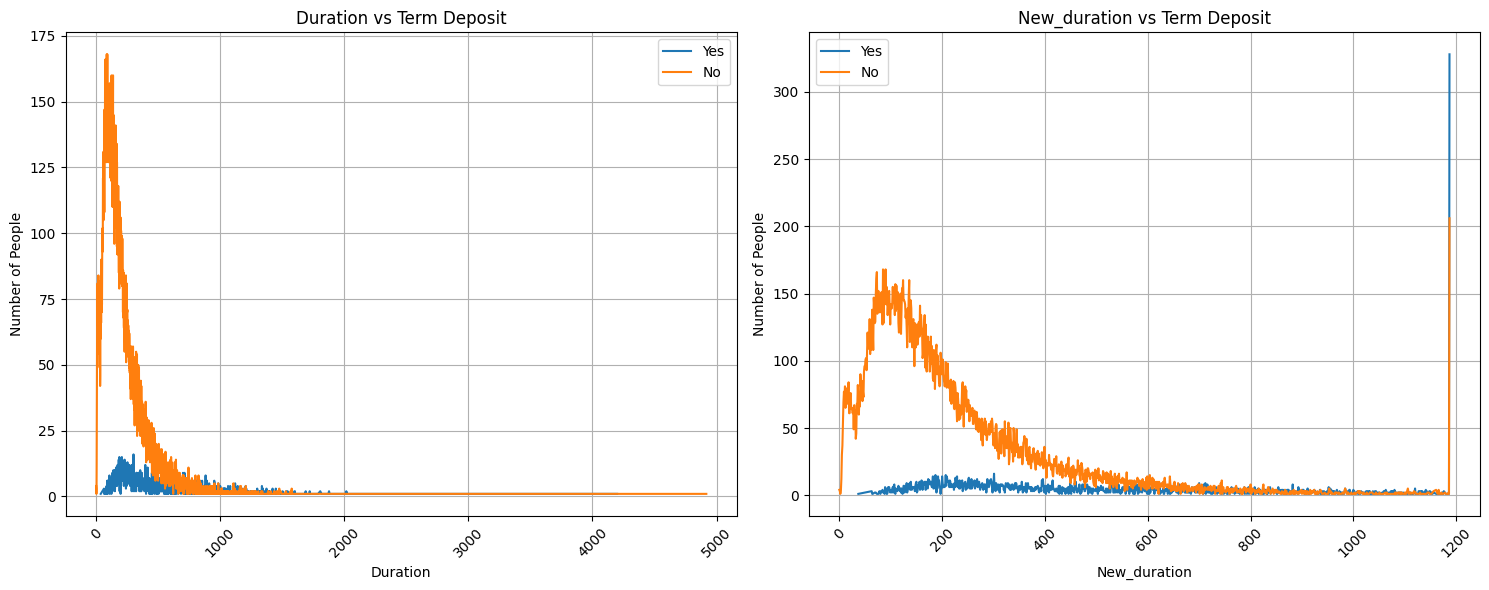

In [579]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Wider, shorter layout
feature_name = ['duration', 'new_duration']

for i, fea in enumerate(feature_name):
    yes_column = data[data['y'] == 'yes'][fea].value_counts().sort_index()
    no_column = data[data['y'] == 'no'][fea].value_counts().sort_index()
    
    ax = axs[i]  # Direct indexing because axs is 1D
    ax.plot(yes_column.index, yes_column.values, label='Yes')
    ax.plot(no_column.index, no_column.values, label='No')
    
    ax.set_title(f'{fea.capitalize()} vs Term Deposit')
    ax.set_xlabel(fea.capitalize())
    ax.set_ylabel('Number of People')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


In [580]:
data['age'] = BoxplotOutlierClipper(whisker_coeff=1.1).fit_transform(data['age'])
data['duration'] = BoxplotOutlierClipper(whisker_coeff=-5).fit_transform(data['duration'])
data.drop(columns=['new_age','new_duration'], axis=1, inplace=True)
feature=['age','job','marital','education','default','loan','campaign','duration','emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
aim=data[feature].copy()

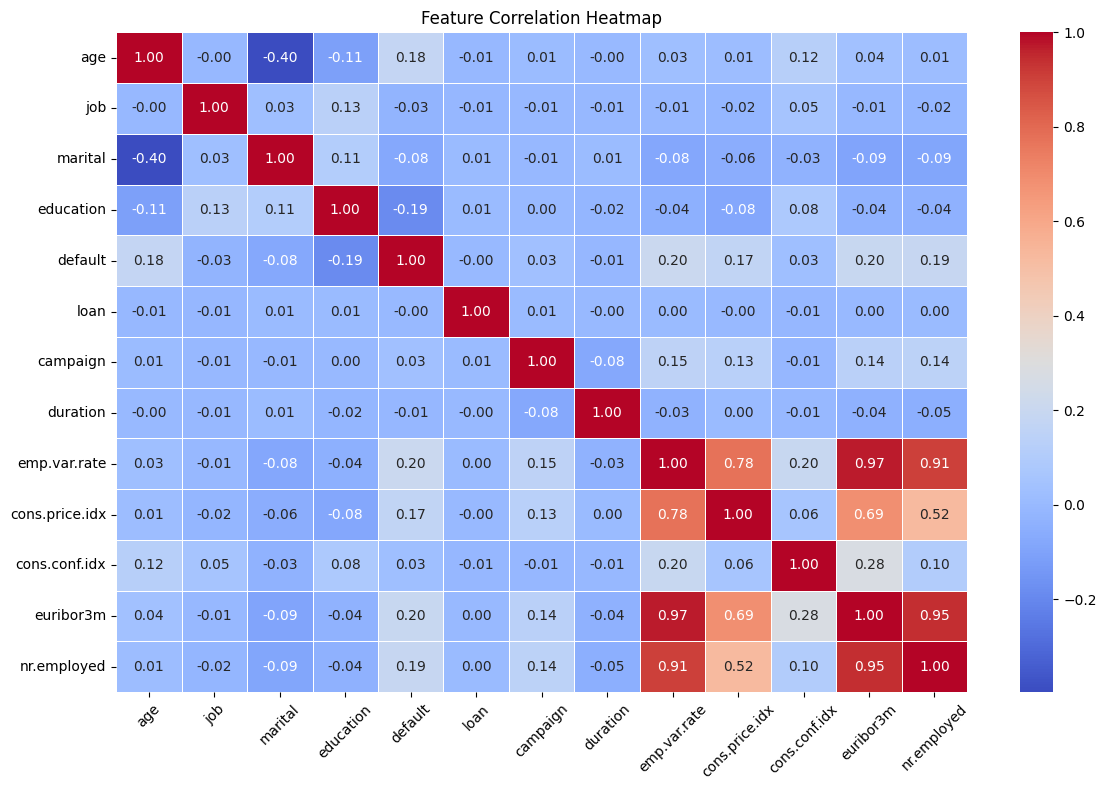

In [581]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
object_cols = ['job', 'marital', 'education', 'default', 'loan']

for col in object_cols:
    aim[col] = LabelEncoder().fit_transform(aim[col])

corr_matrix = aim.corr()
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [582]:
from sklearn.decomposition import PCA
pca_attr=['emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']
data_pca=data[pca_attr]
pca = PCA(n_components=2)  # Change number of components if needed
pca_result = pca.fit_transform(data_pca)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
aim.drop(columns=pca_attr,axis=1,inplace=True)
aim['general_economic_1']=pca_df['PC1']
aim['general_economic_2']=pca_df['PC2']
aim.columns

Index(['age', 'job', 'marital', 'education', 'default', 'loan', 'campaign',
       'duration', 'cons.conf.idx', 'general_economic_1',
       'general_economic_2'],
      dtype='object')

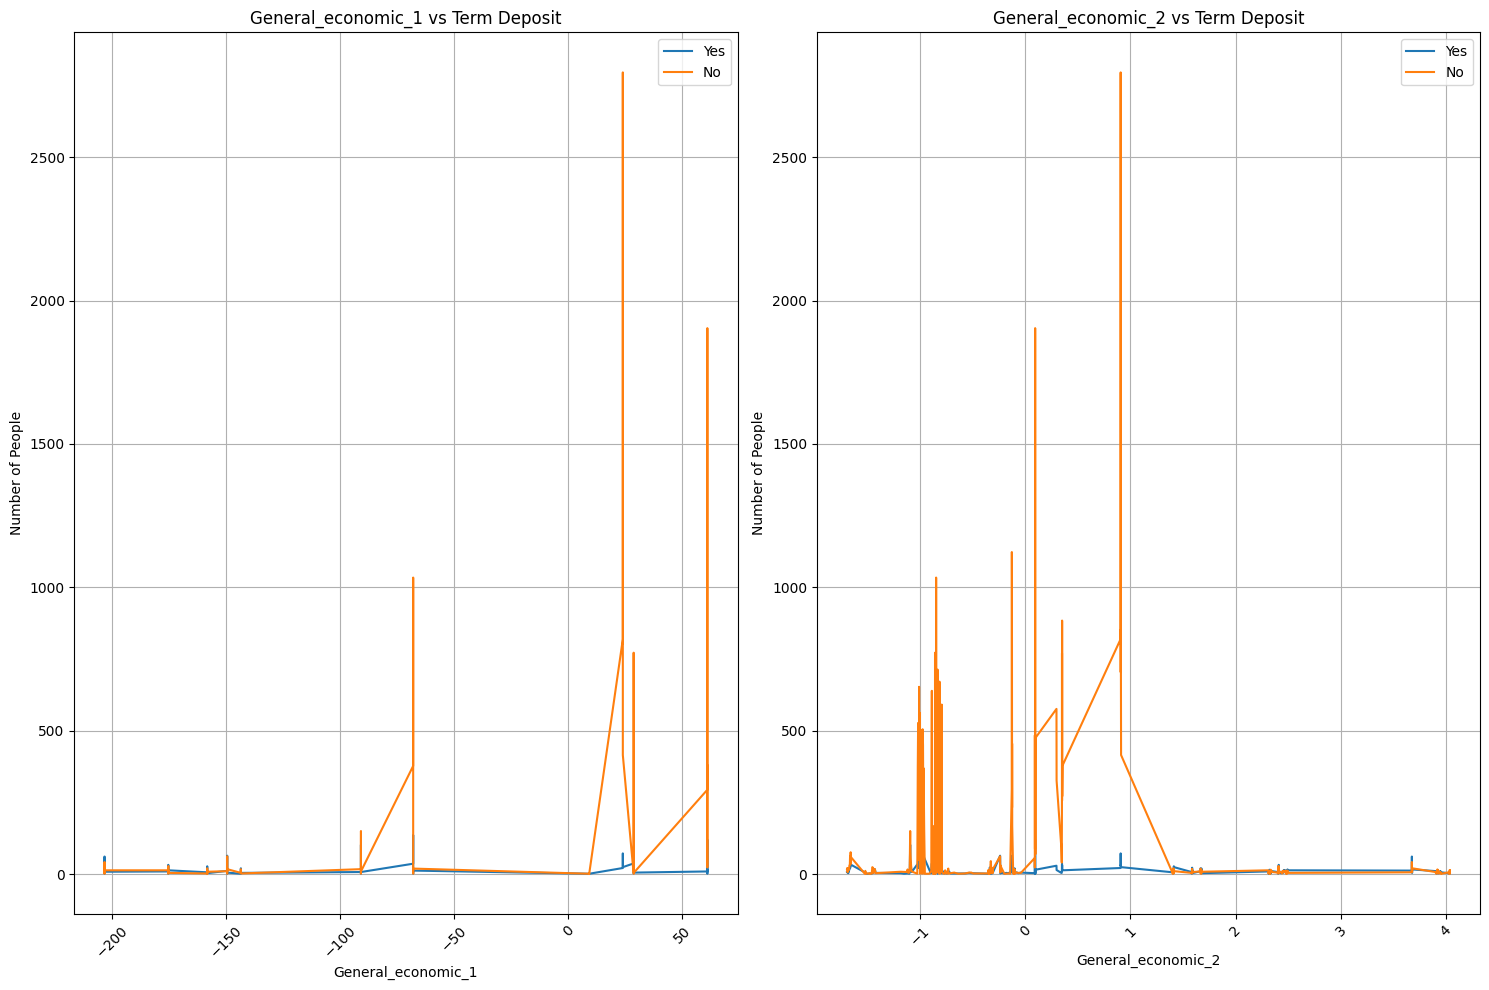

In [583]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))  # Bigger figure for clarity
feature_name = ['general_economic_1', 'general_economic_2']
aim['y']=data['y']
for i, fea in enumerate(feature_name):
    yes_column = aim[aim['y'] == 'yes'][fea].value_counts().sort_index()
    no_column = aim[data['y'] == 'no'][fea].value_counts().sort_index()
    
    ax = axs[i]  # Direct indexing because axs is 1D
    ax.plot(yes_column.index, yes_column.values, label='Yes')
    ax.plot(no_column.index, no_column.values, label='No')
    
    ax.set_title(f'{fea.capitalize()} vs Term Deposit')
    ax.set_xlabel(fea.capitalize())
    ax.set_ylabel('Number of People')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [584]:
from imblearn.over_sampling import *

other=data[feature+['y']]
over=RandomOverSampler()

x_re, y_re=over.fit_resample(aim.drop(columns='y',axis=1),aim['y'])

x_re['y']=y_re



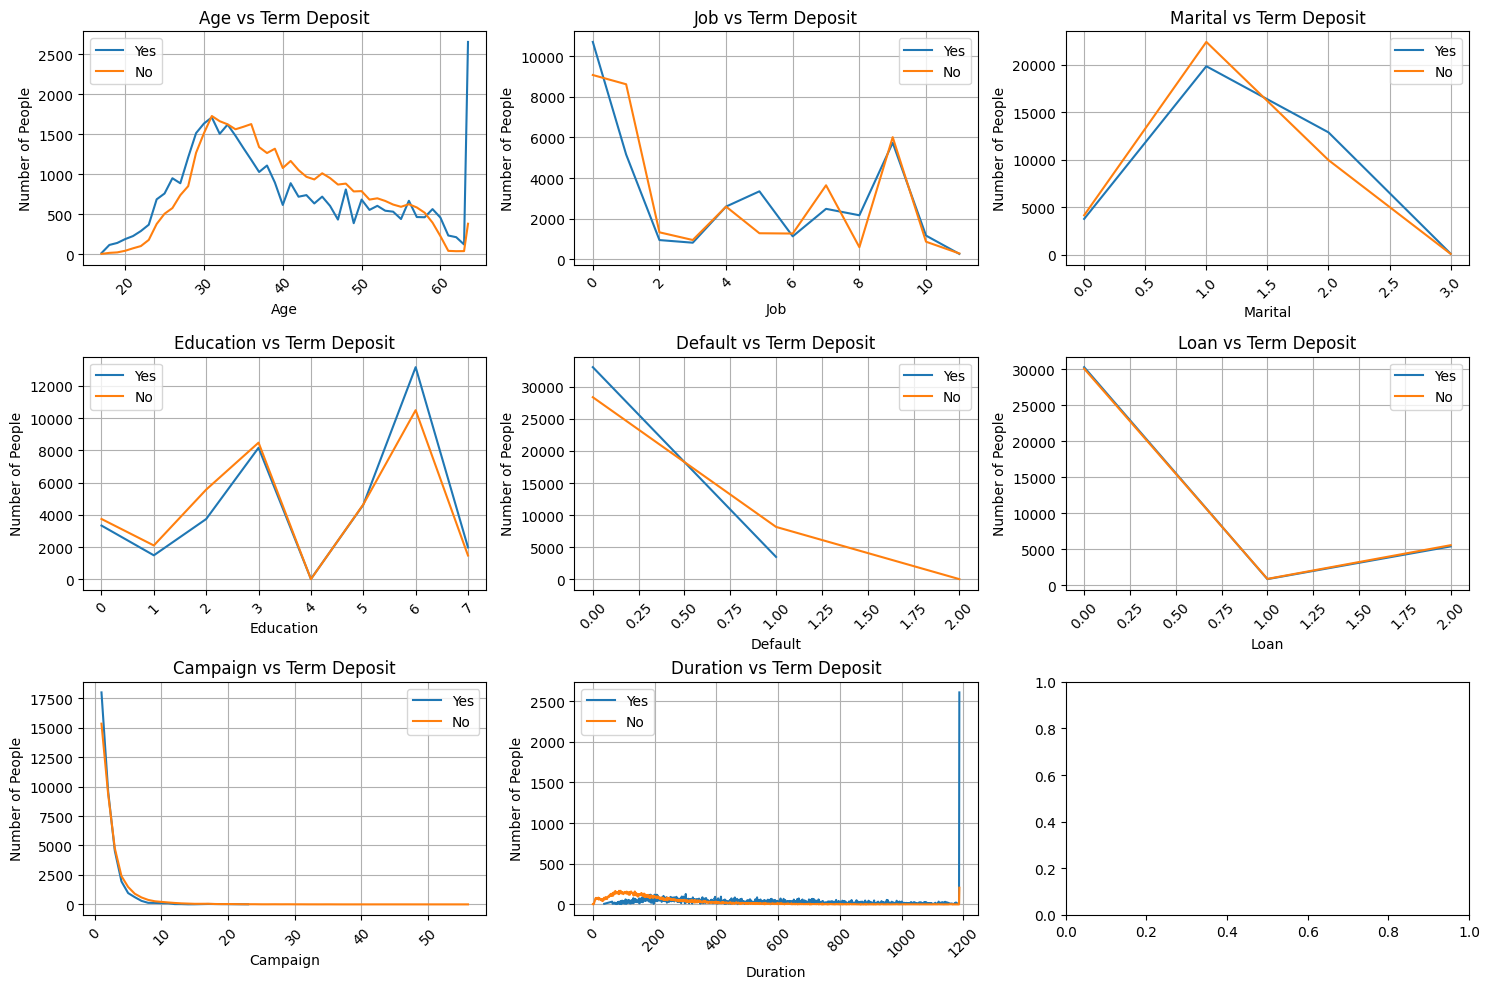

In [585]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # Bigger figure for clarity
feature_name = ['age', 'job', 'marital', 'education', 'default', 'loan', 'campaign', 'duration']

for i, fea in enumerate(feature_name):
    row = i // 3
    col = i % 3
    
    yes_column = x_re[x_re['y'] == 'yes'][fea].value_counts().sort_index()
    no_column = x_re[x_re['y'] == 'no'][fea].value_counts().sort_index()
    
    ax = axs[row, col]
    ax.plot(yes_column.index, yes_column.values, label='Yes')
    ax.plot(no_column.index, no_column.values, label='No')
    
    ax.set_title(f'{fea.capitalize()} vs Term Deposit')
    ax.set_xlabel(fea.capitalize())
    ax.set_ylabel('Number of People')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [586]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

gnb=GaussianNB()

X_train,X_test,y_train,y_test = train_test_split(aim.drop(columns='y',axis=1),aim['y'],test_size=0.3,random_state=43)

over=KMeansSMOTE()

X_re, y_re=over.fit_resample(X_train,y_train)

gnb.fit(X_re,y_re)
y_pred=gnb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.93      0.94      0.94     10952
         yes       0.50      0.46      0.48      1405

    accuracy                           0.89     12357
   macro avg       0.71      0.70      0.71     12357
weighted avg       0.88      0.89      0.88     12357



In [587]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.95      0.92      0.93     10952
         yes       0.50      0.64      0.56      1405

    accuracy                           0.89     12357
   macro avg       0.72      0.78      0.75     12357
weighted avg       0.90      0.89      0.89     12357



In [588]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(X_re,y_re)
y_pred=gbc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10952
         yes       0.64      0.56      0.60      1405

    accuracy                           0.91     12357
   macro avg       0.79      0.76      0.77     12357
weighted avg       0.91      0.91      0.91     12357



In [589]:
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95     10952
         yes       0.65      0.55      0.60      1405

    accuracy                           0.92     12357
   macro avg       0.80      0.76      0.78     12357
weighted avg       0.91      0.92      0.91     12357

